In [1]:
import pandas as pd
filename = './weibo_senti_100k.csv'

In [2]:
pd_all = pd.read_csv( filename)

print('评论数目（总体）：%d' % pd_all.shape[0])
print('评论数目（正向）：%d' % pd_all[pd_all.label==1].shape[0])
print('评论数目（负向）：%d' % pd_all[pd_all.label==0].shape[0])

评论数目（总体）：119988
评论数目（正向）：59993
评论数目（负向）：59995


In [3]:
pd_all.sample(20)

,label,review
94790,0,收工收工！终于把#年代秀#高考考完了[鼓掌]地理音乐文学历史数学语文化学有你不考的吗？[晕]...
25226,1,第四届齐云山山地越野赛经过一个多小时激烈的角逐，冠军由上海亦德文化传播有限公司的马磊，许宝俊...
40104,1,好多美女！[哈哈] //@FAY菲妃霏:如果你兼具美丽活力又喜爱旅游，那就赶快报名参加比赛吧...
49262,1,[威武][鼓掌][耶]
100216,0,[泪][泪][泪]这帮人，数学竟然比马来西亚差！
77179,0,我同门师弟在布朗大学研究阿卡德语和古巴比伦天文学，圣经旧约及希伯来语与古巴比伦有关系吗？ /...
60343,0,研表究明，汉字序顺并不定一影阅响读！事证实明了当你看这完句话之后才发字现都乱是的！[晕]
89508,0,[衰] //@王杰joy:回复@璐在乾方:这~~~~吓着我了~ //@璐在乾方:回复@王杰j...
88531,0,牙疼，牙疼，牙疼，疼，疼，疼。。。。[泪][泪][泪]
52890,1,[赞]//@太阳鸟20101122: [耶] //@美丽天使-qing:就是北大的[good...


In [4]:
import jieba

def word_cut(texts):
    words_list = []
    word_generator = jieba.cut(texts, cut_all=False)
    exclude =['和','的']
    for word in word_generator:
        if (word.strip() not in exclude):
            words_list.append(word)
    return ' '.join(words_list)

pd_all['review_cut'] = pd_all.review.apply( word_cut)
pd_all.head()
    

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.202 seconds.
Prefix dict has been built successfully.


,label,review,review_cut
0,1,﻿更博了，爆照了，帅的呀，就是越来越爱你！生快傻缺[爱你][爱你][爱你],﻿ 更博 了 ， 爆照 了 ， 帅 呀 ， 就是 越来越 爱 你 ！ 生快 傻 缺 [ 爱 ...
1,1,@张晓鹏jonathan 土耳其的事要认真对待[哈哈]，否则直接开除。@丁丁看世界 很是细心...,@ 张晓鹏 jonathan 土耳其 事要 认真对待 [ 哈哈 ] ， 否则 直接 开除...
2,1,姑娘都羡慕你呢…还有招财猫高兴……//@爱在蔓延-JC:[哈哈]小学徒一枚，等着明天见您呢/...,姑娘 都 羡慕 你 呢 … 还有 招财猫 高兴 … … / / @ 爱 在 蔓延 - JC ...
3,1,美~~~~~[爱你],美 ~ ~ ~ ~ ~ [ 爱 你 ]
4,1,梦想有多大，舞台就有多大![鼓掌],梦想 有 多 大 ， 舞台 就 有 多 大 ! [ 鼓掌 ]


positive words


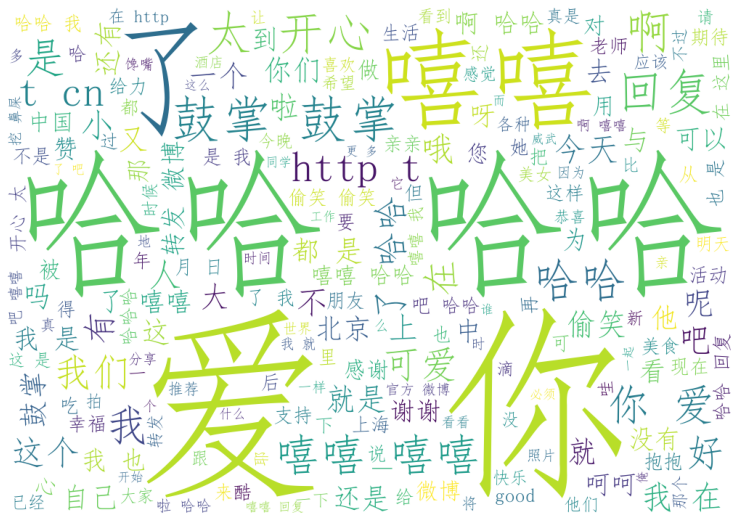

In [5]:
import wordcloud
import matplotlib.pyplot as plt 
    
font='C:/Windows/Fonts/simfang.ttf'
exclude =['和','的']
def draw_wordcloud( words, color='white'):
    w = wordcloud.WordCloud( \
        width = 1000, height = 700,\
        background_color = color,\
        font_path=font,\
        stopwords=exclude
        ).generate(words)
    plt.figure(1, figsize=(13,13))
    plt.imshow(w)
    plt.axis('off')
    plt.show()

print("positive words")
pd_all_pos = pd_all[ pd_all['label']==1]
words_pos = ' '.join(pd_all_pos['review_cut'])
draw_wordcloud(words_pos)